In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

file = 'winequality-white.csv'

와인의 품질 선별 모델 <hr>
- 데이터 : wine.csv
- 피  처 : fixed acidity(고정산도), alcohol(알코올)
- 타  겟 : quality

In [3]:
wineDF = pd.read_csv(file, sep = ';') # 구분자 ';'로 설정.
wine_corr = wineDF.corr()
abs(wine_corr['quality']).sort_values(ascending=False).head(3)

quality    1.000000
alcohol    0.435575
density    0.307123
Name: quality, dtype: float64

In [4]:
# 결측치 확인
# wineDF.isna().sum() # 결측치 없음.

# 이상치 확인
# for col in wineDF.columns:
#     print(wineDF[col].unique)

# 중복값 확인
#wineDF.duplicated().sum()

In [5]:
# 타겟 고유값 확인 -> 3~9까지
wineDF['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [6]:
fx_data = wineDF['density']
al_data = wineDF['alcohol']

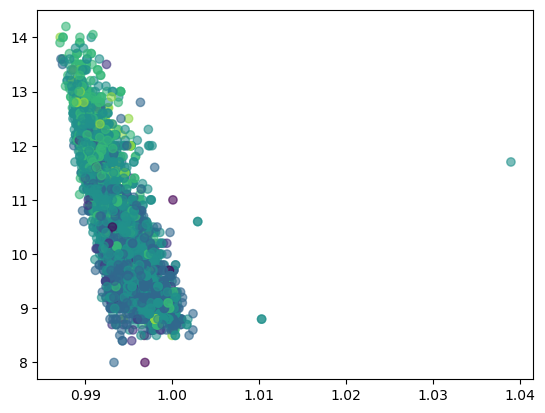

In [7]:
import matplotlib.pyplot as plt
plt.scatter(fx_data, al_data, c = wineDF.quality, alpha=0.6)
plt.show()

(3) 기계학습을 위한 데이터 준비
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋  : 80%
- 테스트용 데이터셋 : 20%

In [8]:
wineDF = wineDF.sample(frac = 1.) # 확률 1 = 100% 데이터를 100% 섞는다.
wineDF = wineDF[['quality', 'density', 'alcohol']]
#wineDF = wineDF.reset_index(drop=True)
wineDF

,quality,density,alcohol
2255,6,0.99466,10.0
4420,6,0.99906,8.8
2296,7,0.99460,10.6
159,8,0.98940,12.1
2146,6,0.99540,9.6
...,...,...,...
4821,6,0.99176,11.0
416,6,0.99270,9.8
202,5,0.99730,9.6
4673,7,0.99161,11.8


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 피처 및 타겟 준비
featureDF = wineDF[['density', 'alcohol']]
targetSR = wineDF['quality']

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2)

In [11]:
print(f"X_train : {X_train.shape}")
print(X_train.head(2))
print()
print(f"y_train : {y_train.shape}")
print(y_train.head(2))
print()
print(f"X_test : {X_test.shape}")
print(X_test.head(2))
print()
print(f"y_test : {y_test.shape}")
print(y_test.head(2))

X_train : (3918, 2)
      density  alcohol
3326  0.99204     10.2
2319  0.99096     12.7

y_train : (3918,)
3326    5
2319    7
Name: quality, dtype: int64

X_test : (980, 2)
      density  alcohol
4865  0.98822     13.6
776   0.99215     11.0

y_test : (980,)
4865    6
776     6
Name: quality, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler
# 표준 정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit( ) 메서드
# (3) 데이터에 대한 스케일링 진행 : transform( ) 메서드
scaler = StandardScaler()
scaler

StandardScaler()

In [13]:
X_train

,density,alcohol
3326,0.99204,10.200000
2319,0.99096,12.700000
3466,0.99000,12.900000
2260,0.99748,9.300000
3080,0.99184,10.500000
...,...,...
4380,0.99332,11.066667
3715,0.99712,9.100000
1908,0.99140,12.500000
3493,0.99408,13.000000


In [14]:
scaler.fit(X_train)

StandardScaler()

In [15]:
scaler.mean_

array([ 0.99404241, 10.50855964])

In [16]:
scaled_X_train = scaler.transform(X_train)
print(scaled_X_train.shape)

scaled_X_test = scaler.transform(X_test)
print(scaled_X_test.shape)



(3918, 2)
(980, 2)


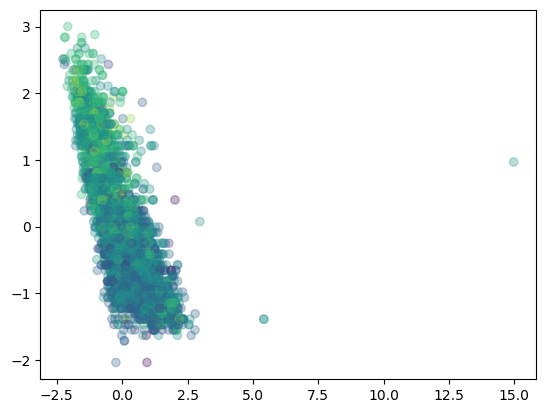

In [17]:
## -> 스케일된 데이터의 시각화
#scaled_x_test
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c = y_train, alpha=0.3)
# plt.xlabel('alcohol')
# plt.ylabel('densinty')
plt.show()

In [18]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()

# 학습 진행 => 학습용 데이터로 진행
model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
test_scoreList = []
train_scoreList =[]
for k in range(1, 101): # k에는 0이 들어갈 수 없음.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    model.score(scaled_X_test, y_test)
    train_scoreList.append(model.score(scaled_X_train, y_train))
    test_scoreList.append(model.score(scaled_X_test, y_test))

In [20]:
# 학습 및 테스트 데이터에 대한 점수 확인.
print(f'Train Score : {train_scoreList}')
print(f'Test Score : {test_scoreList}')

Train Score : [0.8810617662072486, 0.7521694742215416, 0.7291985706993364, 0.689382337927514, 0.6643695763144462, 0.6442062276671772, 0.6291475242470649, 0.6112812659520164, 0.5893312914752424, 0.5750382848392037, 0.574527820316488, 0.5627871362940275, 0.5548749361919346, 0.5482388973966309, 0.5467075038284839, 0.5431342521694742, 0.5454313425216948, 0.5464522715671261, 0.5398162327718223, 0.5428790199081164, 0.5416028586013272, 0.5387953037263911, 0.532669729453803, 0.5352220520673813, 0.5352220520673813, 0.5352220520673813, 0.537263910158244, 0.5290964777947933, 0.5262889229198571, 0.531138335885656, 0.5303726391015824, 0.52475752935171, 0.5262889229198571, 0.5324144971924452, 0.5296069423175089, 0.5280755487493619, 0.5303726391015824, 0.5270546197039305, 0.5270546197039305, 0.5262889229198571, 0.5265441551812149, 0.52475752935171, 0.5308831036242981, 0.5288412455334355, 0.5265441551812149, 0.5245022970903522, 0.5209290454313426, 0.5234813680449208, 0.5183767228177641, 0.518376722817

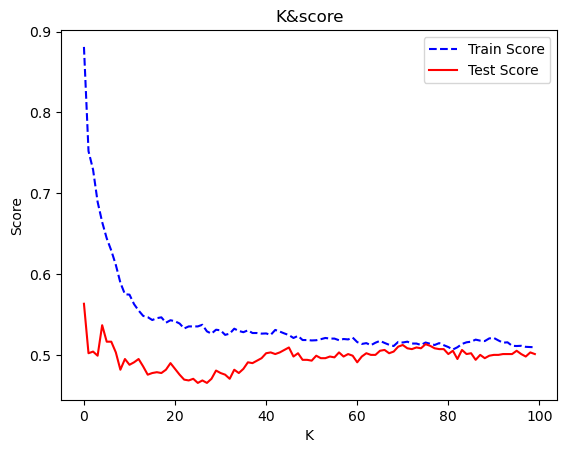

In [21]:
# K개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train Score')
plt.plot(test_scoreList, 'r-', label = 'Test Score')
plt.title('K&score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [22]:
test_scoreList.index(max(test_scoreList))

0

In [23]:
winemodel = KNeighborsClassifier(n_neighbors=1) # n_neighbors = 하이퍼 파라미터
winemodel.fit(scaled_X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [24]:
winemodel.score(scaled_X_test, y_test)

0.563265306122449